<a href="https://colab.research.google.com/github/garciafred/Proyecto-IA/blob/main/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


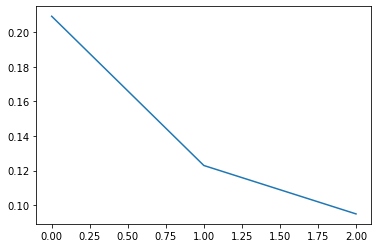

SCORE PCA:  0.7857142857142857
SCORE IPCA:  0.8051948051948052
Metricas cross_validation [0.84027778 0.86111111 0.88811189 0.85314685 0.8041958 ]
Media de cross_validation 0.8493686868686868
Metrica en Test 0.8051948051948052


In [18]:
# Se importan las bibliotecas generales
 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
 
# Se importan los módulos específicos
 
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
 
#Para probar rendimiento de las implementaciones se utiliza clasificador 
from sklearn.linear_model import LogisticRegression

#Para preparar los datos antes del entrenamiento
from sklearn.preprocessing import StandardScaler #Para normalizar los datos
from sklearn.model_selection import train_test_split #Para partir datos (prue y entr)

#Para validación cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import datasets, metrics

#Identificar archivo principal 
if __name__ == "__main__": 

   kf = KFold(n_splits=5)
   clf = LogisticRegression()
   clf.fit(X_train, y_train)
   score = clf.score(X_train,y_train)
   scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
   # Para cargar los datos del dataframe de pandas
   dt_heart = pd.read_csv('Heart.csv')
 
   # Imprimir un encabezado con los primeros 5 registros
   print(dt_heart.head(5))
 
   # Guardar el dataset sin la columna de target
   dt_features = dt_heart.drop(['target'], axis=1)
   # El dataset, pero sin la columna
   dt_target = dt_heart['target']
 
   # Se normalizan los datos
   dt_features = StandardScaler().fit_transform(dt_features)
  
   # Partiendo del conjunto de entrenamiento. Para añadir replicabilidad se utiliza el random state
   X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)
   
   #Llamar y configurar PCA, por defecto n_componentes= min(n_muestras, n_features)
   pca = PCA(n_components=3)
   pca.fit(X_train)

   #Batch es para crear pequeños bloques, para ir entrenandolos poco a poco y combinarlos en el resultado final
   ipca =IncrementalPCA(n_components=3, batch_size=10)
   ipca.fit(X_train)

   #Representación gráfica de la varianza de los componentes que se extraen
   plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
   plt.show()
   
   #Configurar regresión logística
   logistic = LogisticRegression(solver='lbfgs')

   # Configurar los datos de entrenamiento aplicando PCA
   dt_train = pca.transform(X_train)
   dt_test = pca.transform(X_test)

   # Ahora mandar los data frames la la regresión logística
   logistic.fit(dt_train, y_train) 

   #Para calcular exactitud de la predicción
   print("SCORE PCA: ", logistic.score(dt_test, y_test))

   # Lo mismo pero con IPCA
   dt_train = ipca.transform(X_train)
   dt_test = ipca.transform(X_test)
   logistic.fit(dt_train, y_train)
   print("SCORE IPCA: ", logistic.score(dt_test, y_test))

   scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
   print("Metricas cross_validation", scores)
   print("Media de cross_validation", scores.mean())
   preds = clf.predict(X_test)
   score_pred = metrics.accuracy_score(y_test, preds)
   print("Metrica en Test", score_pred)
